In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1st dataset

In [2]:
data=pd.read_csv("adult.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.drop(['fnlwgt','workclass','educational-num','marital-status','race','relationship','capital-gain','capital-loss','hours-per-week','native-country'],axis=1,inplace=True)

In [6]:
data.head()

,age,education,occupation,gender,income
0,25,11th,Machine-op-inspct,Male,<=50K
1,38,HS-grad,Farming-fishing,Male,<=50K
2,28,Assoc-acdm,Protective-serv,Male,>50K
3,44,Some-college,Machine-op-inspct,Male,>50K
4,18,Some-college,?,Female,<=50K


In [7]:
c=0
for ind in range(data.shape[0]):
    if data.loc[ind,'occupation'] == '?':
        c=c+1
        
print(c)

2809


In [8]:
data = data[data['occupation'] != '?']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         46033 non-null  int64 
 1   education   46033 non-null  object
 2   occupation  46033 non-null  object
 3   gender      46033 non-null  object
 4   income      46033 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
data.isnull().sum()

age           0
education     0
occupation    0
gender        0
income        0
dtype: int64

In [10]:
data= data.drop(data[data.occupation == '?'].index)
data=data.reindex()
data

,age,education,occupation,gender,income
0,25,11th,Machine-op-inspct,Male,<=50K
1,38,HS-grad,Farming-fishing,Male,<=50K
2,28,Assoc-acdm,Protective-serv,Male,>50K
3,44,Some-college,Machine-op-inspct,Male,>50K
5,34,10th,Other-service,Male,<=50K
...,...,...,...,...,...
48837,27,Assoc-acdm,Tech-support,Female,<=50K
48838,40,HS-grad,Machine-op-inspct,Male,>50K
48839,58,HS-grad,Adm-clerical,Female,<=50K
48840,22,HS-grad,Adm-clerical,Male,<=50K


# 2nd dataset

In [11]:
df=pd.read_csv("Salary Data.csv")

In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [13]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [15]:
df['salr'] = ""

In [16]:
for ind in range(df.shape[0]):
    if df.loc[ind,'Salary'] <= 50000:
        df.loc[ind,'salr'] = '<=50k'
    else:
        df.loc[ind,'salr'] = '>50k'
    


In [17]:
mean_age = df['Age'].mean()
mean_salary = df['Salary'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df['Salary'] = df['Salary'].fillna(mean_salary)

In [18]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 0
salr                   0
dtype: int64

In [19]:
df = df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
salr                   0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
 6   salr                 373 non-null    object 
dtypes: float64(3), object(4)
memory usage: 23.3+ KB


In [21]:
df.drop(['Years of Experience','Salary'],axis=1,inplace=True)
print(df)


      Age  Gender Education Level                      Job Title   salr
0    32.0    Male      Bachelor's              Software Engineer   >50k
1    28.0  Female        Master's                   Data Analyst   >50k
2    45.0    Male             PhD                 Senior Manager   >50k
3    36.0  Female      Bachelor's                Sales Associate   >50k
4    52.0    Male        Master's                       Director   >50k
..    ...     ...             ...                            ...    ...
370  35.0  Female      Bachelor's       Senior Marketing Analyst   >50k
371  43.0    Male        Master's         Director of Operations   >50k
372  29.0  Female      Bachelor's         Junior Project Manager  <=50k
373  34.0    Male      Bachelor's  Senior Operations Coordinator   >50k
374  44.0  Female             PhD        Senior Business Analyst   >50k

[373 rows x 5 columns]


# Renaming

In [22]:
data.rename(columns = {'occupation':'Job Title','age':'Age','income':'salr','gender':'Gender','education':'Education Level'}, inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              46033 non-null  int64 
 1   Education Level  46033 non-null  object
 2   Job Title        46033 non-null  object
 3   Gender           46033 non-null  object
 4   salr             46033 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# Integration


In [24]:
data1 = pd.concat([data, df], axis = 0,ignore_index=True)

In [25]:
data1.head()

,Age,Education Level,Job Title,Gender,salr
0,25.0,11th,Machine-op-inspct,Male,<=50K
1,38.0,HS-grad,Farming-fishing,Male,<=50K
2,28.0,Assoc-acdm,Protective-serv,Male,>50K
3,44.0,Some-college,Machine-op-inspct,Male,>50K
4,34.0,10th,Other-service,Male,<=50K


In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46406 entries, 0 to 46405
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              46406 non-null  float64
 1   Education Level  46406 non-null  object 
 2   Job Title        46406 non-null  object 
 3   Gender           46406 non-null  object 
 4   salr             46406 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


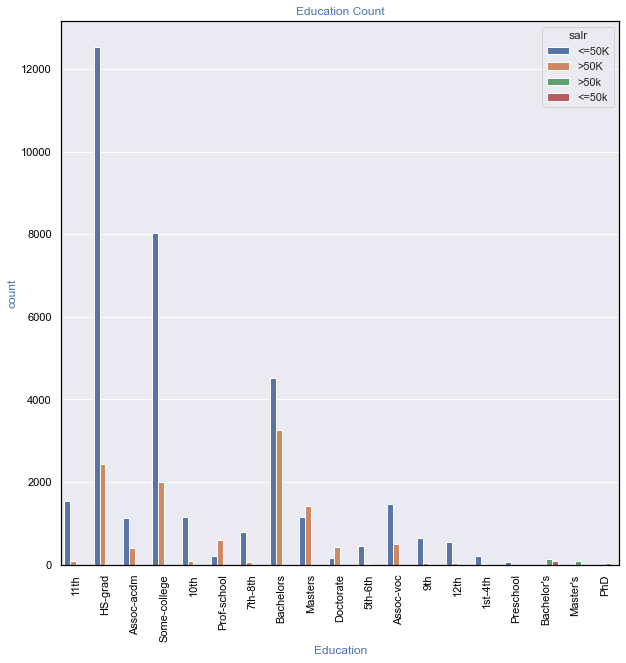

In [27]:
import seaborn as sns   
sns.set(color_codes=True)
plt.figure(figsize=(10,10))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    scatplot = sns.countplot(x="Education Level",hue="salr", data=data1)

    plt.xlabel('Education',color="b")
    plt.ylabel('count',color="b")
    plt.xticks(rotation=90)
    plt.title('Education Count',color="b")
    plt.show()

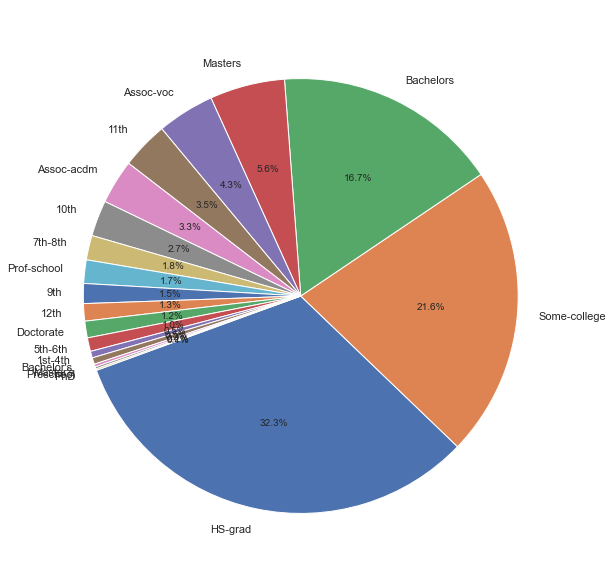

In [28]:
plt.figure(figsize=(10,10))
temp_series = data1['Education Level'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Education", fontsize=15,color="w")
plt.savefig('Pie-chart')
plt.show()

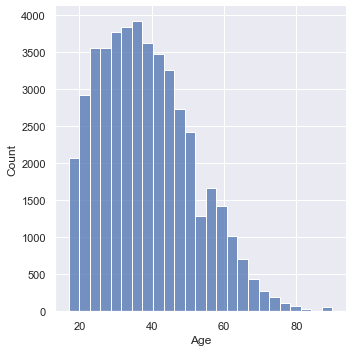

In [29]:
sns.displot(data1["Age"],bins=25)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

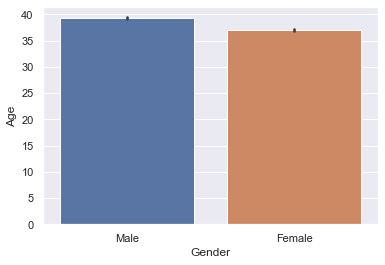

In [30]:
sns.barplot(x = 'Gender', y = 'Age', data = data)

# Modelling 

In [31]:
dummies=pd.get_dummies(data1.Gender)
dummies.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [32]:
data1 =pd.concat([data1, dummies],axis='columns')
data1.drop('Gender', axis='columns', inplace=True)
data1.head()

,Age,Education Level,Job Title,salr,Female,Male
0,25.0,11th,Machine-op-inspct,<=50K,0,1
1,38.0,HS-grad,Farming-fishing,<=50K,0,1
2,28.0,Assoc-acdm,Protective-serv,>50K,0,1
3,44.0,Some-college,Machine-op-inspct,>50K,0,1
4,34.0,10th,Other-service,<=50K,0,1


In [33]:
from sklearn.preprocessing import LabelEncoder
Edu_lvl = LabelEncoder()
Job = LabelEncoder()
data1['Edu_lvl'] = Edu_lvl.fit_transform(data1['Education Level'])
data1['Job'] = Job.fit_transform(data1['Job Title'])

In [34]:
d = data1.drop(['Education Level','Job Title'],axis= 'columns')
d.head()

,Age,salr,Female,Male,Edu_lvl,Job
0,25.0,<=50K,0,1,1,87
1,38.0,<=50K,0,1,12,39
2,28.0,>50K,0,1,7,107
3,44.0,>50K,0,1,18,87
4,34.0,<=50K,0,1,0,97


In [35]:
Y = d.salr
X = d.drop('salr',axis='columns')
print (X.head())

    Age  Female  Male  Edu_lvl  Job
0  25.0       0     1        1   87
1  38.0       0     1       12   39
2  28.0       0     1        7  107
3  44.0       0     1       18   87
4  34.0       0     1        0   97


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs', max_iter=5000)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
y_test_pred= logr.predict(X_train)

In [38]:
from sklearn.metrics import accuracy_score
#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(y_train))

73.56490260299948
73.6610734398345


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_test_pred = nb.predict(X_train)

#testing accuracy
print(accuracy_score(y_test, y_pred, normalize=False, sample_weight=None)*100/len(y_test))
#training accuracy
print(accuracy_score(y_train, y_test_pred, normalize=False, sample_weight=None)*100/len(y_train))

71.06533356317877
71.95724629352948
